## Import 2015-2019 Data

In [1]:
import pandas as pd
import openpyxl
import os
import glob
from pathlib import Path


In [2]:

# Replace 'your_file.xlsx' with the correct path to your Excel file
#file_path = r'Tabular_Sem1-A15129\Plot_Level\2015-2019 Wheat Main Plot Data (All traits)_anonymized.xlsx'


# Define the relative path
file_path = Path("Tabular_Sem1-A15129") / "Plot_Level" / "2015-2019 Wheat Main Plot Data (All traits)_anonymized.xlsx"

# Convert to an absolute path (optional)
file_path = file_path.resolve()
df_crop = pd.read_excel(file_path, engine="openpyxl")
df_crop['SowingDate'] = pd.to_datetime(df_crop['SowingDate'])
df_crop['HarvestDate'] = pd.to_datetime(df_crop['HarvestDate'])
print(df_crop.head())


   Year   Name State MET Analysis Mega Region RegionName  TrialCode  \
0  2015  Wheat   NSW                 Northern        N/E  trial_719   
1  2015  Wheat   NSW                 Northern        N/E  trial_719   
2  2015  Wheat   NSW                 Northern        N/E  trial_719   
3  2015  Wheat   NSW                 Northern        N/E  trial_719   
4  2015  Wheat   NSW                 Northern        N/E  trial_719   

  SiteDescription SowingDate HarvestDate Abandoned  ...  \
0         Bellata 2015-05-19  2015-11-24     False  ...   
1         Bellata 2015-05-19  2015-11-24     False  ...   
2         Bellata 2015-05-19  2015-11-24     False  ...   
3         Bellata 2015-05-19  2015-11-24     False  ...   
4         Bellata 2015-05-19  2015-11-24     False  ...   

   Septoria Tritici score  Shattering %  Standability  Tillering Score  \
0                     NaN           NaN           NaN              NaN   
1                     NaN           NaN           NaN              NaN

## EDA for 2015-2019 Crop Data

### Dimension of Dataset

In [3]:
df_crop.shape

(99499, 64)

### Check Data

In [4]:
df_crop.head()  # First 5 rows


,Year,Name,State,MET Analysis Mega Region,RegionName,TrialCode,SiteDescription,SowingDate,HarvestDate,Abandoned,...,Septoria Tritici score,Shattering %,Standability,Tillering Score,Vigour,Waterlogging score,Weed Contamination,Wheel track,Yellow Leaf Spot score,Zadoks score
0,2015,Wheat,NSW,Northern,N/E,trial_719,Bellata,2015-05-19,2015-11-24,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,Wheat,NSW,Northern,N/E,trial_719,Bellata,2015-05-19,2015-11-24,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,Wheat,NSW,Northern,N/E,trial_719,Bellata,2015-05-19,2015-11-24,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,Wheat,NSW,Northern,N/E,trial_719,Bellata,2015-05-19,2015-11-24,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,Wheat,NSW,Northern,N/E,trial_719,Bellata,2015-05-19,2015-11-24,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Duplicate Records

In [5]:
df_crop.duplicated().sum()
# no duplicates

np.int64(0)

### Handle missing Values for crop plot main data

In [6]:
pd.DataFrame(df_crop.isnull().sum(), columns=['Number of missing values']).transpose()


,Year,Name,State,MET Analysis Mega Region,RegionName,TrialCode,SiteDescription,SowingDate,HarvestDate,Abandoned,...,Septoria Tritici score,Shattering %,Standability,Tillering Score,Vigour,Waterlogging score,Weed Contamination,Wheel track,Yellow Leaf Spot score,Zadoks score
Number of missing values,0,0,0,20887,0,0,0,1593,7455,915,...,99471,97987,99241,93051,77554,98977,98760,99396,98608,73005


### remove columns with more than 80% missing value

In [7]:
threshold = 0.8
df_crop = df_crop.loc[:, df_crop.isnull().mean() <= threshold]
print(df_crop.shape)

(99499, 26)


### remove rows with missing Sowing Date or Harvest Date

In [8]:
df_crop = df_crop.dropna(subset=['SowingDate', 'HarvestDate', 'Abandoned', 'Kg/Plot', 'GrainYield_gm2'])
print(df_crop.shape)

(91538, 26)


In [9]:
df_crop['Abandoned'] = df_crop['Abandoned'].astype(bool)
df_crop = df_crop[df_crop['Abandoned'] == False]
print(df_crop['Abandoned'].dtype)
print(df_crop['Abandoned'].value_counts())
print(df_crop.shape)


bool
Abandoned
False    91538
Name: count, dtype: int64
(91538, 26)


In [10]:
pd.DataFrame(df_crop.isnull().sum(), columns=['Number of missing values']).transpose()

,Year,Name,State,MET Analysis Mega Region,RegionName,TrialCode,SiteDescription,SowingDate,HarvestDate,Abandoned,...,Harvest Length,Harvest Width,Kg/Plot,GrainYield_gm2,Residual,Establishment,Early Growth Score,Number of Rows per Plot,Vigour,Zadoks score
Number of missing values,0,0,0,13316,0,0,0,0,0,0,...,0,0,0,0,903,36354,55564,12211,71813,65767


In [11]:
columns_to_keep = ['Year', 'Name', 'State', 'RegionName', 'TrialCode', 'SowingDate', 'HarvestDate', 'GrainYield_gm2', 'CultivarID', 'Harvest Width', 'Harvest Length', 'Kg/Plot']
df_filtered = df_crop[columns_to_keep]
df_filtered.head()

,Year,Name,State,RegionName,TrialCode,SowingDate,HarvestDate,GrainYield_gm2,CultivarID,Harvest Width,Harvest Length,Kg/Plot
0,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,422.902494,ea9c07b5,2.1,8.4,7.46
1,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,342.403628,cd19a3a0,2.1,8.4,6.04
2,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,408.491107,e7cf3b4d,2.1,8.3,7.12
3,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,392.290249,41230145,2.1,8.4,6.92
4,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,349.579832,201d5469,2.1,8.5,6.24


In [12]:
print(df_filtered.describe())

               Year                     SowingDate  \
count  91538.000000                          91538   
mean    2016.884026  2017-04-08 15:32:43.014267136   
min     2015.000000            2015-05-01 00:00:00   
25%     2016.000000            2016-05-06 00:00:00   
50%     2017.000000            2017-05-11 00:00:00   
75%     2018.000000            2018-05-28 00:00:00   
max     2019.000000            2019-07-22 00:00:00   
std        1.422865                            NaN   

                         HarvestDate  GrainYield_gm2  Harvest Width  \
count                          91538    91538.000000   91538.000000   
mean   2017-10-14 01:33:53.961852160      320.850274       1.838115   
min              2015-09-30 00:00:00        0.647059       1.100000   
25%              2016-11-14 00:00:00      185.400129       1.750000   
50%              2017-11-20 00:00:00      302.477710       1.800000   
75%              2018-12-05 00:00:00      428.016162       2.000000   
max             

## Analyse Data Distributions

In [13]:
df_filtered

,Year,Name,State,RegionName,TrialCode,SowingDate,HarvestDate,GrainYield_gm2,CultivarID,Harvest Width,Harvest Length,Kg/Plot
0,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,422.902494,ea9c07b5,2.1,8.4,7.46
1,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,342.403628,cd19a3a0,2.1,8.4,6.04
2,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,408.491107,e7cf3b4d,2.1,8.3,7.12
3,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,392.290249,41230145,2.1,8.4,6.92
4,2015,Wheat,NSW,N/E,trial_719,2015-05-19,2015-11-24,349.579832,201d5469,2.1,8.5,6.24
...,...,...,...,...,...,...,...,...,...,...,...,...
99494,2019,Wheat,WA,Agzone6,trial_1356,2019-05-20,2019-12-03,194.117647,614f4f0d,1.7,10.0,3.30
99495,2019,Wheat,WA,Agzone6,trial_1356,2019-05-20,2019-12-03,479.411765,b94909c4,1.7,10.0,8.15
99496,2019,Wheat,WA,Agzone6,trial_1356,2019-05-20,2019-12-03,420.588235,e34efa34,1.7,10.0,7.15
99497,2019,Wheat,WA,Agzone6,trial_1356,2019-05-20,2019-12-03,394.117647,37aa66e8,1.7,10.0,6.70


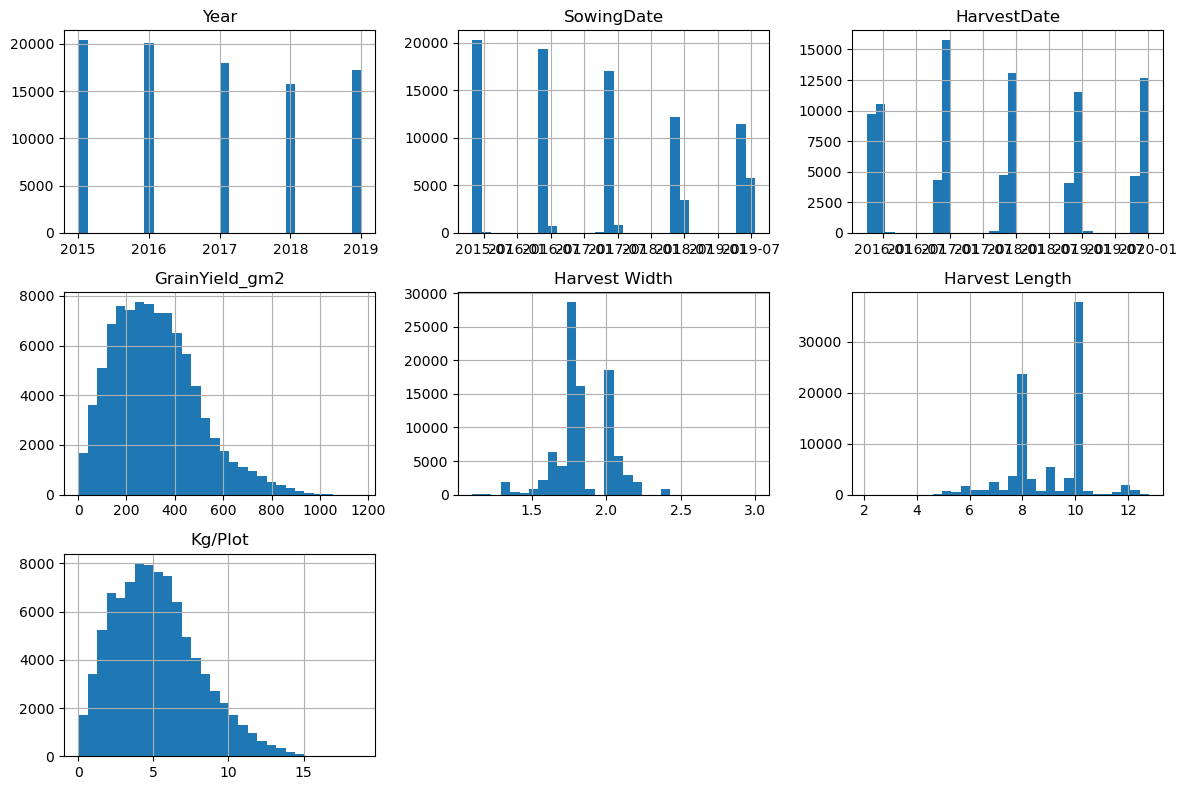

In [14]:
import matplotlib.pyplot as plt

df_filtered.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

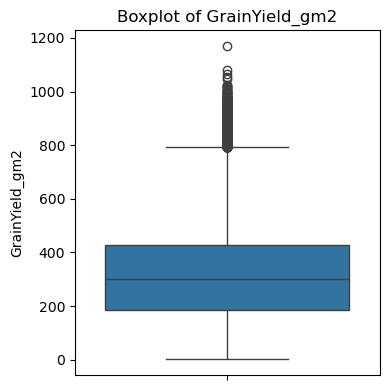

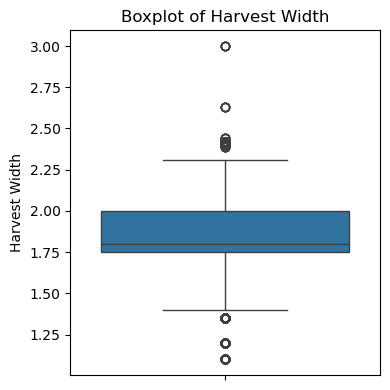

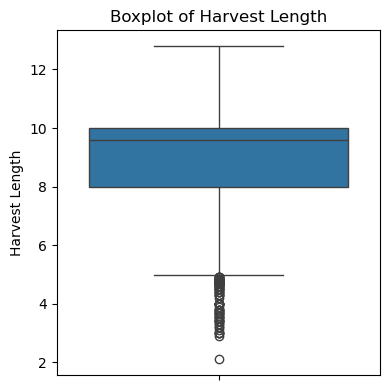

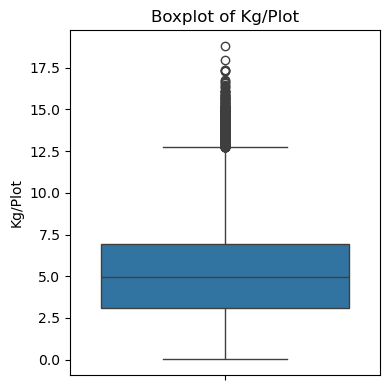

In [23]:
# Create individual box plots for each variable
import seaborn as sns
variables = ['GrainYield_gm2', 'Harvest Width', 'Harvest Length', 'Kg/Plot']

for variable in variables:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=variable, data=df_filtered)
    plt.title(f'Boxplot of {variable}')
    plt.ylabel(variable)
    plt.tight_layout()
    plt.show()


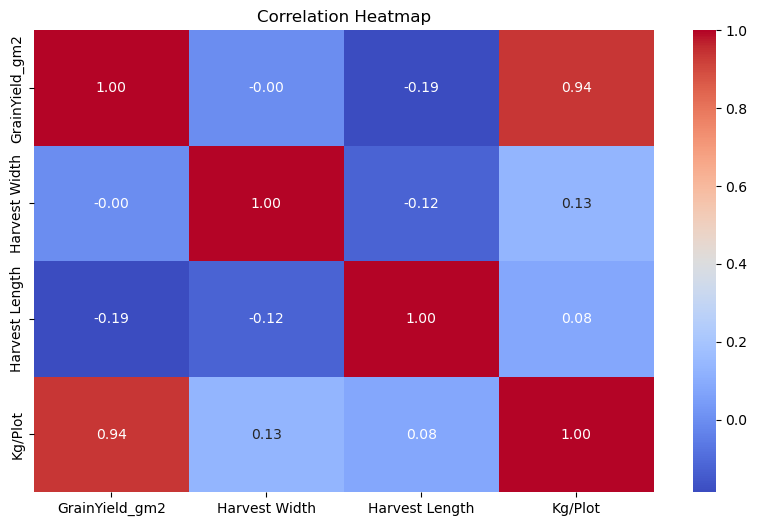

In [29]:
# Select numeric columns for correlation
numeric_df = df_filtered.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'])


# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Import weather data

In [16]:
import os
import glob
import pandas as pd

# Set the folder path
#folder_path = r'Tabular_Sem1-A15129\Weather_data\SILO_Point_Data'
folder_path = Path("Tabular_Sem1-A15129") / "Weather_data" / "SILO_Point_Data"

folder_path = folder_path.resolve()
# Print the absolute folder path to check if it's correct
print(f"Absolute Folder Path: {os.path.abspath(folder_path)}")

# Use glob to find all .csv files (including in subdirectories)
file_paths = glob.glob(os.path.join(folder_path, '**', '*.csv'), recursive=True)

# Print the file paths to verify that files are detected
print(f"Detected Files: {file_paths}")

# Create an empty dictionary to store the data
df_trial_weather_dict = {}
print(file_paths[0])
# Load the data into a DataFrame
# df = pd.read_csv(file_paths[0], skiprows=30, sep='\s+', header=1)
# df = df.iloc[1:]
# df.head()
#Loop through each file and load it into a pandas DataFrame
for file_path in file_paths:
    # Extract the file name without the path
    file_name = os.path.basename(file_path)
    
    # Remove the '_SILOweather' part from the file name to use as the key
    key = file_name.replace('_SILOweather.csv', '')
    
    try:
        # Load the data into a DataFrame
        df = pd.read_csv(file_path, skiprows=30, sep='\s+', header=1)
        df = df.iloc[1:]
        # Store the DataFrame in the dictionary with the modified file name as the key
        df_trial_weather_dict[key] = df

    except pd.errors.EmptyDataError:
        # Handle the case where the file is empty
        print(f"Warning: The file '{file_name}' is empty and was skipped.")
    except Exception as e:
        # Handle other potential errors
        print(f"Error reading file '{file_name}': {e}")

# Print the first few rows of one of the DataFrames to confirm it's working
if df_trial_weather_dict:
    print(df_trial_weather_dict)
else:
    print("No dataframes were loaded.")


<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
/var/folders/s0/zjtw3dfs1lnb2sbbtdml_jzc0000gn/T/ipykernel_56918/264713348.py:36: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, skiprows=30, sep='\s+', header=1)


Absolute Folder Path: /Users/harrymok/Documents/2025/sem1/DATA7901/Tabular_Sem1-A15129/Weather_data/SILO_Point_Data
Detected Files: ['/Users/harrymok/Documents/2025/sem1/DATA7901/Tabular_Sem1-A15129/Weather_data/SILO_Point_Data/trial_1454_SILOweather.csv', '/Users/harrymok/Documents/2025/sem1/DATA7901/Tabular_Sem1-A15129/Weather_data/SILO_Point_Data/trial_1660_SILOweather.csv', '/Users/harrymok/Documents/2025/sem1/DATA7901/Tabular_Sem1-A15129/Weather_data/SILO_Point_Data/trial_801_SILOweather.csv', '/Users/harrymok/Documents/2025/sem1/DATA7901/Tabular_Sem1-A15129/Weather_data/SILO_Point_Data/trial_973_SILOweather.csv', '/Users/harrymok/Documents/2025/sem1/DATA7901/Tabular_Sem1-A15129/Weather_data/SILO_Point_Data/trial_1469_SILOweather.csv', '/Users/harrymok/Documents/2025/sem1/DATA7901/Tabular_Sem1-A15129/Weather_data/SILO_Point_Data/trial_788_SILOweather.csv', '/Users/harrymok/Documents/2025/sem1/DATA7901/Tabular_Sem1-A15129/Weather_data/SILO_Point_Data/trial_1397_SILOweather.csv', '/

## EDA on Weather Datasets

### check dimension of dataframes

In [17]:
pd.set_option("display.max_rows", 10)
summary_df = pd.DataFrame([(key, df.shape[0], df.shape[1]) for key, df in df_trial_weather_dict.items()],
                          columns=["Dataset", "Rows", "Columns"])
display(summary_df)

,Dataset,Rows,Columns
0,trial_1454,517,17
1,trial_1660,517,17
2,trial_801,517,17
3,trial_973,517,17
4,trial_1469,517,17
...,...,...,...
825,trial_1283,517,17
826,trial_1218,516,17
827,trial_1357,517,17
828,trial_1225,516,17


### Check duplicate records

In [18]:
pd.set_option("display.max_rows", 10)
summary_df = pd.DataFrame([(key, df.duplicated().sum()) for key, df in df_trial_weather_dict.items()],
                          columns=["Dataset", "Duplicates"])
display(summary_df)
# no duplicates found

,Dataset,Duplicates
0,trial_1454,0
1,trial_1660,0
2,trial_801,0
3,trial_973,0
4,trial_1469,0
...,...,...
825,trial_1283,0
826,trial_1218,0
827,trial_1357,0
828,trial_1225,0


### Handle missing values

In [19]:
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_colwidth", None)
#pd.set_option("display.max_columns", None)
summary_df = pd.DataFrame([(key, df.isnull().sum().sum()) for key, df in df_trial_weather_dict.items()],
                          columns=["Dataset", "missing_values"])
display(summary_df)
# No missing values found

,Dataset,missing_values
0,trial_1454,0
1,trial_1660,0
2,trial_801,0
3,trial_973,0
4,trial_1469,0
...,...,...
825,trial_1283,0
826,trial_1218,0
827,trial_1357,0
828,trial_1225,0


### Data Type conversion

In [20]:
for key, weather_df in df_trial_weather_dict.items():
    weather_df['Date'] = pd.to_datetime(weather_df['Date'], errors='coerce')

### Numerical Summary

In [21]:
# for key, weather_df in df_trial_weather_dict.items():
#     df.hist(figsize=(12, 8), bins=30)
# plt.show()

In [22]:
for trial_code, df in df_trial_weather_dict.items():
    print(df.columns)
    #df['Date'] = pd.to_datetime(df['Date'])

aggregated_results = {}

for _, row in df_crop.iterrows():
    trial_code = row['TrialCode']
    
    # Check if trial exists in the timescale dictionary
    if trial_code in df_trial_weather_dict:
        df_timescale = df_trial_weather_dict[trial_code]
        
        # Merge the trial timescale data with the crop data
        df_merged = pd.merge(df_timescale, row.to_frame().T, on='TrialCode', how='inner')
        
        # Filter rows based on the sowing and harvest dates
        df_filtered = df_merged[(df_merged['Date'] >= df_merged['SowingDate']) & (df_merged['Date'] <= df_merged['HarvestDate'])]
        
        # Perform aggregation (e.g., sum of Value for each TrialCode)
        aggregated_data = df_filtered.groupby('TrialCode').agg({'Value': 'sum'}).reset_index()
        
        # Store the result in the dictionary
        aggregated_results[trial_code] = aggregated_data

for trial_code, result in aggregated_results.items():
    print(f"Aggregated data for {trial_code}:\n{result}\n")

Index(['Date', 'Day', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 'Evap',
       'Sev', 'Radn', 'Ssl', 'VP', 'Svp', 'RHmaxT', 'RHminT', 'Date2'],
      dtype='object')
Index(['Date', 'Day', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 'Evap',
       'Sev', 'Radn', 'Ssl', 'VP', 'Svp', 'RHmaxT', 'RHminT', 'Date2'],
      dtype='object')
Index(['Date', 'Day', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 'Evap',
       'Sev', 'Radn', 'Ssl', 'VP', 'Svp', 'RHmaxT', 'RHminT', 'Date2'],
      dtype='object')
Index(['Date', 'Day', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 'Evap',
       'Sev', 'Radn', 'Ssl', 'VP', 'Svp', 'RHmaxT', 'RHminT', 'Date2'],
      dtype='object')
Index(['Date', 'Day', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 'Evap',
       'Sev', 'Radn', 'Ssl', 'VP', 'Svp', 'RHmaxT', 'RHminT', 'Date2'],
      dtype='object')
Index(['Date', 'Day', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 'Evap',
       'Sev', 'Radn', 'Ssl', 'VP', 'Svp', 'RHmaxT', 'RHminT', 'Date2

KeyError: 'TrialCode'

## Select useful features

In [ ]:
columns_to_keep = [
    'Year', 'Name', 'State', 'RegionName', 'SiteDescription', 'TrialCode', 
    'SowingDate', 'HarvestDate', 'Abandoned', 
    'Range', 'Row', 'CultivarID', 
    'Harvest Length', 'Harvest Width', 'Kg/Plot', 'GrainYield_gm2', 'Residual'
]

# Filter the DataFrame to keep only the selected columns
df_filtered = df[columns_to_keep]
df_filtered.head()

,Year,Name,State,RegionName,SiteDescription,TrialCode,SowingDate,HarvestDate,Abandoned,Range,Row,CultivarID,Harvest Length,Harvest Width,Kg/Plot,GrainYield_gm2,Residual
0,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19 00:00:00,2015-11-24 00:00:00,False,1,1,ea9c07b5,8.4,2.1,7.46,422.902494,0.060914
1,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19 00:00:00,2015-11-24 00:00:00,False,1,2,cd19a3a0,8.4,2.1,6.04,342.403628,-0.164896
2,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19 00:00:00,2015-11-24 00:00:00,False,1,3,e7cf3b4d,8.3,2.1,7.12,408.491107,0.001737
3,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19 00:00:00,2015-11-24 00:00:00,False,1,4,41230145,8.4,2.1,6.92,392.290249,0.096828
4,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19 00:00:00,2015-11-24 00:00:00,False,1,5,201d5469,8.5,2.1,6.24,349.579832,-0.097151
